<a href="https://colab.research.google.com/github/alaa1996001/Hello_world/blob/master/Multithread%2Bmultiprocessing_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi Threads:
We'll start with a demonstration, using Python's threading module to create several concurrent threads and investigate their impact on this computer's CPU usage.

In [ ]:
""" Threads that waste CPU cycles """

import os
import threading

# a simple function that wastes CPU cycles forever
def cpu_waster():
    while True:
        pass

# display information about this process
print('\n  Process ID: ', os.getpid())
print('Thread Count: ', threading.active_count())
for thread in threading.enumerate():
    print(thread)

print('\nStarting 12 CPU Wasters...')
for i in range(12):
    threading.Thread(target=cpu_waster).start()

# display information about this process
print('\n  Process ID: ', os.getpid())
print('Thread Count: ', threading.active_count())
for thread in threading.enumerate():
    print(thread)



  Process ID:  102
Thread Count:  4
<_MainThread(MainThread, started 140398755035008)>
<Thread(Thread-2, started daemon 140398357976832)>
<Heartbeat(Thread-3, started daemon 140398349584128)>
<ParentPollerUnix(Thread-1, started daemon 140398285227776)>

Starting 12 CPU Wasters...

  Process ID:  102
Thread Count:  16
<_MainThread(MainThread, started 140398755035008)>
<Thread(Thread-2, started daemon 140398357976832)>
<Heartbeat(Thread-3, started daemon 140398349584128)>
<ParentPollerUnix(Thread-1, started daemon 140398285227776)>
<Thread(Thread-4, started 140398276835072)>
<Thread(Thread-5, started 140398268442368)>
<Thread(Thread-6, started 140398260049664)>
<Thread(Thread-7, started 140398251656960)>
<Thread(Thread-8, started 140398243264256)>
<Thread(Thread-9, started 140398234871552)>
<Thread(Thread-10, started 140398226216704)>
<Thread(Thread-11, started 140398217824000)>
<Thread(Thread-12, started 140398209431296)>
<Thread(Thread-13, started 140398201038592)>
<Thread(Thread-14, 

##Multiple Processes
To leverage multiple processors, and to achieve true parallel execution in python, rather than structuring our program to use multiple threads, we'll need to use multiple processes. Fortunately, Python's multiprocessing package makes that pretty straight forward, because it provides an API for spawning additional processes that looks very similar to the threading module.

In [ ]:
#!/usr/bin/env python3
""" Threads that waste CPU cycles """

import os
import threading
import multiprocessing as mp

# a simple function that wastes CPU cycles forever
def cpu_waster():
    while True:
        print('\n  Process id: ', os.getpid())
        pass

print('Hi! My name is', __name__)
if __name__ == '__main__':
    # display information about this process
    print('\n  Process ID: ', os.getpid())
    print('Thread Count: ', threading.active_count())
    
    for thread in threading.enumerate():
        print(thread)

    print('\nStarting 12 CPU Wasters...')
    for i in range(12):
        mp.Process(target=cpu_waster).start()


    # display information about this process
    print('\n  Process ID: ', os.getpid())
    print('Thread Count: ', threading.active_count())
    for thread in threading.enumerate():
        print(thread)


Hi! My name is __main__

  Process ID:  20654
Thread Count:  4
<_MainThread(MainThread, started 139632682698624)>
<Thread(Thread-2, started daemon 139632285640448)>
<Heartbeat(Thread-3, started daemon 139632277247744)>
<ParentPollerUnix(Thread-1, started daemon 139632212891392)>

Starting 12 CPU Wasters...

  Process id: 
  Process id:  20670

  Process id:  20670
 20671

  Process id:  20671
 20685

  Process id: 
  Process id:  20685

  Process id: 
  Process id: 
  Process id: 
  Process id:  20678

  Process id:  20670
 20685

  Process id:  20671

  Process id:  20690

  Process id:  20695
 20678

  Process id:  20670

  Process id: 
  Process id: 
  Process id: 
  Process id: 
  Process id:  20690

  Process id:  20670
 20671
 20695

  Process id:  20678

  Process id:  20685
 20716

  Process id: 
  Process id: 
  Process id: 
  Process id:  20670
 20690

  Process id: 
  Process id:  20671

  Process id:  20725

  Process id: 
  Process id:  20752
 20695

  Process id:  20670
 

##Event Scheduling

Threads don't just execute whenever they want to. A computer might have hundreds of processes with thousands of threads that all want their turn to run on just a handful of processors. So how do they decide who goes first? - That's the operating system's job. The OS includes a scheduler that controls when different threads and processes get their turn to execute on the CPU. The scheduler makes it possible for multiple programs to run concurrently on a single processor. When a process is created and ready to run, it gets loaded into memory and placed in the ready queue. Think of these as cooks in the kitchen that are ready to work. The scheduler is like the head chef that tells the other cooks when they get to use the cutting board. It cycles through the ready processes so they get a chance to execute on the processor. 

If there are multiple processors, then the OS will schedule processes to run on each of them to make the most use of the additional resources. A process will run until it finishes, and then a scheduler will assign another process to execute on that processor. Or, a process might get blocked and have to wait for an I/O event, in which case it'll go into a separate I/O waiting queue so another process can run. Or, the scheduler might determine that a process has spent its fair share of time on the processor, and swap it out for another process from the ready queue. When that occurs, it's called a **context switch**. The operating system has to save the state or context of the process that was running so it can be resumed later, and it has to load the context of the new process that's about to run. Context switches are not instantaneous. It takes time to save and restore the registers and memory state, so the scheduler needs a strategy for how frequently it switches between processes. There's a wide variety of algorithms that different operating system schedulers implement. Some of these algorithms are preemptive, which means they may pause or preempt a running, low-priority task when a higher priority task enters the ready state. In non-preemptive algorithms, once a process enters the running state, it'll be allowed to run for its allotted time. Which algorithm a scheduler chooses to implement will depend on its goals. Some schedulers might try to maximize throughput, or the amount of work they complete in a given time, whereas others might aim to minimize latency, to improve the system's responsiveness. Different operating systems have different purposes, and a desktop OS like Windows will have a different set of goals and use a different type of scheduler than a real-time OS for embedded systems. Now, while it's important to understand the concept of scheduling, and that it's taking place, you usually don't need to worry about the details of how the scheduler works because it's often handled under the hood by the operating system. In fact, you might not have any control over when the parts of your program actually execute. - And that's an important thing to keep in mind. Avoid running programs expecting that multiple threads or processes will execute in a certain order, or for an equal amount of time, because the operating system may choose to schedule them differently from run to run.

In [ ]:
""" Two threads """

import threading
import time

act = True

def thread_act():
    name = threading.current_thread().getName()
    action_count = 0
    while act:
        print(name, 'made an act!')
        action_count += 1
    print(name, 'made', action_count, 'acts.')

if __name__ == '__main__':
    threading.Thread(target=thread_act, name='T1').start()
    threading.Thread(target=thread_act, name='T2').start()

    time.sleep(1)    # Act for 1 second
    act = False # stop both threads 


Streaming output truncated to the last 5000 lines.
T2 made an act!
T2 made an act!
T2 made an act!
T2 made an act!
T2 made an act!T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 
T2 made an act!
T2 made an act!made an act!
T1 made an act!

T2 made an act!
T2 made an act!
T2 made an act!
T2 made an act!
T2 made an act!
T2 made an act!
T2 made an act!
T2 made an act!
T2 made an act!
T2 made an act!
T2 made an act!
T2 made an act!
T2 made an act!
T2 made an act!
T2T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1  made an act!
T2 made an act!
made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!
T1 made an act!T2 
T1 made an act!
made an act!
T2 made an act!
T2 made an act!
T2 made an act!
T2T1 

##Thread Lifecycle
When a new process or program begins running, it will start with just one thread, which is called the main thread because it's the main one that runs when the program begins. That main thread can then start or spawn additional threads to help out, referred to as its child threads, which are part of the same process but execute independently to do other tasks. Those threads can spawn their own children if needed and as each of those threads finish executing they'll notify their parent and terminate with the main thread usually being the last to finish execution. Over the life cycle of a thread, from creation through execution and finally termination, threads will usually be in one of four states.
- New state: Part of creating a new thread is assigning it a function, the code is going to execute. This thread isn't actually running yet so it doesn't take any CPU resources. 
- Runnable state: Some programming languages require an explicit start. The thread is now in the runnable state, which means the operation system can schedule it to execute.
- Blocked state: When a thread needs to wait for an event to occur, like an external input or a timer, it goes into a blocked state while it waits. The good thing is that while it is blocked it is not using any CPU resources. The operating system will return me to the runnable state when needed- And that frees up the processor for other threads to use. Also a thread can wait for another thread to complete its execution by calling the join method. When it call join, the thread will enter a blocked state waiting for the other one, then it goes back to the runnable state.
- Final Terminated State: A thread enters the terminated state when it either completes its execution or it's abnormally aborted. 

Different programming languages may use different names for their states and have a few additional ones, but in general, new, runnable, blocked, and terminated are the four phases of the life cycle of a thread.


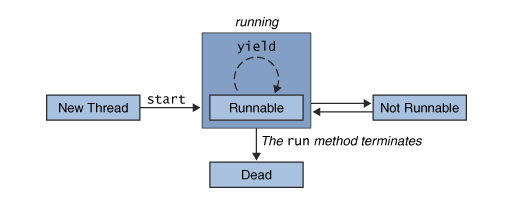







In [ ]:

import threading
import time

class Thread1(threading.Thread):

    def __init__(self):
        super().__init__()

    def run(self):
        print('T1 started & waiting ...')
        time.sleep(3)
        print('T1 is done.')

# main thread
if __name__ == '__main__':
    print("Main Thread started & requesting T1's help.")
    T1 = Thread1()
    print('  T1 alive?:', T1.is_alive())

    print('Main Thread tells T1 to start.')
    T1.start()
    print('  T1 alive?:', T1.is_alive())

    print('Main Thread continues working.')
    time.sleep(0.5)
    print('  T1 alive?:', T1.is_alive())

    print('Main Thread patiently waits for T1 to finish and join...')
    T1.join()
    print('  T1 alive?:', T1.is_alive())

    print('Main Thread and T1 are both done!')


Main Thread started & requesting T1's help.
  T1 alive?: False
Main Thread tells T1 to start.
T1 started & waiting ...
  T1 alive?: True
Main Thread continues working.
  T1 alive?: True
Main Thread patiently waits for T1 to finish and join...
T1 is done.
  T1 alive?: False
Main Thread and T1 are both done!


##Daemon Threads
In computer science, a daemon is a process that runs in the background.

Python threading has a more specific meaning for daemon. A daemon thread will shut down immediately when the program exits. One way to think about these definitions is to consider the daemon thread a thread that runs in the background without worrying about shutting it down.

If a program is running Threads that are not daemons, then the program will wait for those threads to complete before it terminates. Threads that are daemons, however, are just killed wherever they are when the program is exiting.

In [ ]:
""" T1 finishes working while T2 cleans """
#CHECK_Python_folder_TrainingOrange_Deameon falsetrue  
import threading
import time

def T2_cleaner():
    while True:
        print('T2 cleaned the space.')
        time.sleep(1)

if __name__ == '__main__':
    T2 = threading.Thread(target=T2_cleaner)
    T2.daemon = True
    T2.start()

    print('T1 is working...')
    time.sleep(0.6)
    print('T1 is working...')
    time.sleep(0.6)
    print('T1 is working...')
    time.sleep(0.6)
    print('T1 is done!')


T2 cleaned the space.T1 is working...

T1 is working...
T2 cleaned the space.
T1 is working...
T1 is done!
T2 cleaned the space.


##Data Accessibility/Race
Data races are a common problem that can occur when two or more threads are concurrently accessing the same location in memory and at least one of those threads is writing to that location to modify its value. Fortunately you can protect your program against data races by using synchronization techniques. 

But,  you'll first need to know how to recognize the data race.

In [ ]:
""" Two threads adding items to a shared var """

import threading

var_count = 0

def thread_access():
    global var_count
    for i in range(10_000_000):
        var_count += 1

if __name__ == '__main__':
    T1 = threading.Thread(target=thread_access)
    T2 = threading.Thread(target=thread_access)
    T1.start()
    T2.start()
    T1.join()
    T2.join()
    print(var_count)


13429778


##Mutual Exclusion
Anytime multiple threads are concurrently reading and writing a shared resource, it creates the potential for incorrect behavior, like a data race, but we can defend against that by identifying and protecting critical sections of code. A critical section or critical region is part of a program that accesses a shared resource, such as a data structured memory or an external device, and it may not operate correctly if multiple threads concurrently access it. The critical section needs to be protected so that it only allows one thread or process to execute in it at a time.

In [ ]:

""" Two threads adding items to a shared var """

import threading
import time

var_count = 0
ressource_key = threading.Lock()

def thread_access():
    global var_count
    for i in range(5):
        print(threading.current_thread().getName(), 'is thinking.')
        time.sleep(0.5)
        ressource_key.acquire()
        var_count += 1
        print (var_count)
        ressource_key.release()

if __name__ == '__main__':
    T1 = threading.Thread(target=thread_access)
    T2 = threading.Thread(target=thread_access)
    T1.start()
    T2.start()
    T1.join()
    T2.join()
    print( var_count)


Thread-8 is thinking.
Thread-9 is thinking.
1
Thread-8 is thinking.
2
Thread-9 is thinking.
3
Thread-8 is thinking.
4
Thread-9 is thinking.
5
Thread-8 is thinking.
6
Thread-9 is thinking.
7
Thread-8 is thinking.
8
Thread-9 is thinking.
9
10
10


##Reentrant Lock
If a thread tries to lock a mutex that it's already locked, it'll enter into a waiting list for that mutex, which results in something called a deadlock, because no other thread can unlock that mutex. - There may be times when a program needs to lock a mutex multiple times before unlocking it. In that case, you should use a reentrant mutex to prevent this type of problem. A reentrant mutex is a particular type of mutex that can be locked multiple times by the same process or thread. 

Internally, the reentrant mutex keeps track of how many times it's been locked by the owning thread, and it has to be unlocked an equal number of times before another thread can lock it.


One use case where reentrant locks are really needed is when writing a recursive function. That is a function that calls itself. If the function makes a recursive call to itself from within a locked section, it will lock the mutex multiple times as it repeats itself, and then unlock the mutex an equal number of times as it returns and unwinds. Since a reentrant mutex can be used recursively like this, you'll often hear it referred to as a recursive mutex or a recursive lock. Different languages use different terms, but these all basically mean the same thing.

In [ ]:
""" Two thread adding to a same ressource using a Lock """

import threading

res_count = 0
res_key = threading.Lock()

def add_res(name):
    global res_count
    res_key.acquire()
    print(name,'acquired lock',"(res_count = {})".format(res_count))
    res_count += 1
    if res_count < 5:
        add_res(name)
    print(name,'released lock')
    res_key.release()


if __name__ == '__main__':
    T1 = threading.Thread(target=add_res,args=('T1',))
    T2 = threading.Thread(target=add_res,args=('T2',))
    T1.start()
    T2.start()
    T1.join()
    T2.join()
    print('res1:', res1_count)
    print('res2', res2_count)


T1 acquired lock (res_count = 0)


KeyboardInterrupt: ignored

In [ ]:
""" Two thread adding to a same ressource using a RLock """

import threading

res_count = 0
res_key = threading.RLock()

def add_res(name):
    global res_count
    res_key.acquire()
    print(name,'acquired lock',"(res_count = {})".format(res_count))
    res_count += 1
    if res_count < 5:
        add_res(name)
    print(name,'released lock')
    res_key.release()


if __name__ == '__main__':
    T1 = threading.Thread(target=add_res,args=('T1',))
    T2 = threading.Thread(target=add_res,args=('T2',))
    T1.start()
    T2.start()
    T1.join()
    T2.join()
    print('res1:', res1_count)
    print('res2', res2_count)


T1 acquired lock (res_count = 0)
T1 acquired lock (res_count = 1)
T1 acquired lock (res_count = 2)
T1 acquired lock (res_count = 3)
T1 acquired lock (res_count = 4)
T1 released lock
T1 released lock
T1 released lock
T1 released lock
T1 released lock
T2 acquired lock (res_count = 5)
T2 released lock


NameError: ignored

##Try Lock
Try Lock, or Try Enter is a non-blocking version of the lock or acquire method. It returns immediately and one of two things will happen. If the mutex you're trying to lock is available, it will get locked and the method will return true. Otherwise, if the mutex is already possessed by another thread, the Try Lock method will immediately return false. That return value of true or false lets the thread know whether or not it was successful in acquiring the lock.

In [ ]:
#!/usr/bin/env python3
""" Two thread adding items to a shared notepad """

import threading
import time

items_on_notepad = 0
notepad_lock = threading.Lock()

def thread_act():
    global items_on_notepad
    name = threading.current_thread().getName()
    items_to_add = 0
    while items_on_notepad <= 20:
        if items_to_add and notepad_lock.acquire(blocking=False): # add item(s) to shared items_on_notepad
            items_on_notepad += items_to_add
            print(name, 'added', items_to_add, 'item(s) to notepad.')
            items_to_add = 0
            time.sleep(0.3) # time spent writing
            notepad_lock.release()
        else: # look for other things
            time.sleep(0.1) # time spent searching
            items_to_add += 1
            print(name, 'found something else.')

if __name__ == '__main__':
    T1 = threading.Thread(target=thread_act, name='T1')
    T2 = threading.Thread(target=thread_act, name='T2')
    start_time = time.perf_counter()
    T1.start()
    T2.start()
    T1.join()
    T2.join()
    elapsed_time = time.perf_counter() - start_time
    print('Elapsed Time: {:.2f} seconds'.format(elapsed_time))


T1 found something else.
T1 added 1 item(s) to notepad.
T2 found something else.
T2 found something else.
T2 found something else.
T2 found something else.
T2 added 4 item(s) to notepad.
T1 found something else.
T1 found something else.
T1 found something else.
T1 found something else.
T1 added 4 item(s) to notepad.
T2 found something else.
T2 found something else.
T2 found something else.
T2 found something else.
T2 added 4 item(s) to notepad.
T1 found something else.
T1 found something else.
T1 found something else.
T1 found something else.
T1 added 4 item(s) to notepad.
T2 found something else.
T2 found something else.
T2 found something else.
T2 found something else.
T2 added 4 item(s) to notepad.
T1 found something else.
Elapsed Time: 2.12 seconds


##Read-write Lock
We use a lock or mutex to protect a critical section of code to defend against data erases, which can occur when multiple threads are concurrently accessing the same location in memory and at least one of those threads is writing to that location. That second part is key, because if we have a bunch of threads and none of them are writing, they all just want to read from the same location, that's fine. It's okay to let multiple threads read the same shared value as long as no one else can change it. They'll all safely see the same thing. Danger only exists when you add a thread that's writing to the mix. 

A reader-writer lock, or shared mutex, can be locked in one of two ways. It can be locked in a shared read mode that allows multiple threads that only need to read simultaneously to lock it. Or it can be locked in an exclusive write mode that limits access to only one thread at a time, allowing that thread to safely write to the shared resource. A read-write lock is useful for protecting a shared resource like a calendar.

In [ ]:
#pip install readerwriterlock

T2 cleaned the space.
T2 cleaned the space.
T2 cleaned the space.
T2 cleaned the space.


In [ ]:
""" Several users reading a calendar, but only a few users updating it """

import threading
from readerwriterlock import rwlock

WEEKDAYS = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
today = 0
marker = rwlock.RWLockFair()

def calendar_reader(id_number):
    global today
    read_marker = marker.gen_rlock()
    name = 'Reader-' + str(id_number)
    while today < len(WEEKDAYS)-1:
        read_marker.acquire()
        print(name, 'sees that today is', WEEKDAYS[today], '-read count:', read_marker.c_rw_lock.v_read_count)
        read_marker.release()

def calendar_writer(id_number):
    global today
    write_marker = marker.gen_wlock()
    name = 'Writer-' + str(id_number)
    while today < len(WEEKDAYS)-1:
        write_marker.acquire()
        today = (today + 1) % 7
        print(name, 'updated date to ', WEEKDAYS[today])
        write_marker.release()

if __name__ == '__main__':
    # create ten reader threads
    for i in range(10):
        threading.Thread(target=calendar_reader, args=(i,)).start()
    # ...but only two writer threads
    for i in range(2):
        threading.Thread(target=calendar_writer, args=(i,)).start()


Reader-0 sees that today is Sunday -read count: 1
Reader-0 sees that today is Sunday -read count: 1
Reader-0 sees that today is Sunday -read count: 1
Reader-0 sees that today is Sunday -read count: 1
Reader-0 sees that today is Sunday -read count: 1
Reader-0 sees that today is Sunday -read count: 1
Reader-0 sees that today is Sunday -read count:Reader-1 1
Reader-0 sees that today is Sunday -read count: 2
Reader-0 sees that today is Sunday -read count: 2
Reader-0 sees that today is Sunday -read count: 2
Reader-0 sees that today is Sunday -read count: 2
Reader-0 sees that today is Sunday -read count: 2
Reader-0 sees that today is Sunday -read count:  2
Reader-0 sees that today is Sunday -read count: 2
Reader-0 sees that today is Sunday sees that today is-read count: 2
Reader-0 sees that today is Sunday -read count: 2
 Reader-0 sees that today is Sunday Reader-2Sunday -read count:-read count: 2
Reader-0 sees that today is Sunday   sees that today is Sunday -read count:2-read count: 3
Read

##DeadLock
imagine something like a banking application with a set of bank accounts where each one has it's own mutex. To ensure that only one thread will be withdrawing from or depositing funds to that account at a time. To transfer funds between two accounts, a thread needs to acquire the locks for both the sender and the receiver since it would be modifying the value of both accounts. If there are multiple threads concurrently making transfers between the accounts then there's a real chance that the could end up competing for the same locks and run into a sort of deadlock scenario.

In [ ]:
""" Three philosophers, thinking and eating sushi """

import threading

chopstick_a = threading.Lock()
chopstick_b = threading.Lock()
chopstick_c = threading.Lock()
sushi_count = 500

def philosopher(name, first_chopstick, second_chopstick):
    global sushi_count
    while sushi_count > 0: # eat sushi until it's all gone
        first_chopstick.acquire()
        second_chopstick.acquire()

        if sushi_count > 0:
            sushi_count -= 1
            print(name, 'took a piece! Sushi remaining:', sushi_count)

        second_chopstick.release()
        first_chopstick.release()
        
if __name__ == '__main__':
    threading.Thread(target=philosopher, args=('Barron', chopstick_a, chopstick_b)).start()
    threading.Thread(target=philosopher, args=('Olivia', chopstick_b, chopstick_c)).start()
    threading.Thread(target=philosopher, args=('Steve', chopstick_a, chopstick_c)).start()


T2 cleaned the space.
Barron took a piece! Sushi remaining: 499
Barron took a piece! Sushi remaining: 498
Barron took a piece! Sushi remaining: 497
Barron took a piece! Sushi remaining: 496
Barron took a piece! Sushi remaining: 495
Barron took a piece! Sushi remaining: 494
Barron took a piece! Sushi remaining: 493
Barron took a piece! Sushi remaining: 492
Barron took a piece! Sushi remaining: 491
Barron took a piece! Sushi remaining: 490
Barron took a piece! Sushi remaining: 489
Barron took a piece! Sushi remaining: 488
Barron took a piece! Sushi remaining: 487
Barron took a piece! Sushi remaining: 486
Barron took a piece! Sushi remaining: 485
Barron took a piece! Sushi remaining: 484
Barron took a piece! Sushi remaining: 483
Barron took a piece! Sushi remaining: 482
Barron took a piece! Sushi remaining: 481
Barron took a piece! Sushi remaining: 480
Barron took a piece! Sushi remaining: 479
Barron took a piece! Sushi remaining: 478
Barron took a piece! Sushi remaining: 477
Barron took 

The simplest technique to prevent deadlocks is the one we used in this example. Which is to ensure that locks are always taken in the same order by every thread. However, lock ordering may not always be feasible. For example, a thread may not know all of the locks it will need to acquire ahead of taking any of them. Another technique for preventing deadlocks is to put a timeout on lock attempts. If a thread is not able to successfully acquire all of the locks it needs within a certain amount of time, it will back up, free all of the locks that it did take and then wait for a random amount of time before trying again to give other threads a chance to take the locks they need.

##Abandonned Lock
If one thread or process acquires a lock and then terminates because of some unexpected reason it may not automatically release the lock before it disappears. That leaves others tasks like me stuck waiting for a lock that will never be released. Let's look at some code.

In [ ]:
""" Three philosophers, thinking and eating sushi """

import threading

chopstick_a = threading.Lock()
chopstick_b = threading.Lock()
chopstick_c = threading.Lock()
sushi_count = 500

def philosopher(name, first_chopstick, second_chopstick):
    global sushi_count
    while sushi_count > 0: # eat sushi until it's all gone
        with first_chopstick:
            with second_chopstick:
                if sushi_count > 0:
                    sushi_count -= 1
                    print(name, 'took a piece! Sushi remaining:', sushi_count)

                if sushi_count == 10:
                    print(1/0)

if __name__ == '__main__':
    threading.Thread(target=philosopher, args=('A', chopstick_a, chopstick_b)).start()
    threading.Thread(target=philosopher, args=('B', chopstick_b, chopstick_c)).start()
    threading.Thread(target=philosopher, args=('C', chopstick_a, chopstick_c)).start()


A took a piece! Sushi remaining: 499
A took a piece! Sushi remaining: 498
A took a piece! Sushi remaining: 497
A took a piece! Sushi remaining: 496
A took a piece! Sushi remaining: 495
A took a piece! Sushi remaining: 494
A took a piece! Sushi remaining: 493
A took a piece! Sushi remaining: 492
A took a piece! Sushi remaining: 491
A took a piece! Sushi remaining: 490
A took a piece! Sushi remaining: 489
A took a piece! Sushi remaining: 488
A took a piece! Sushi remaining: 487
A took a piece! Sushi remaining: 486
A took a piece! Sushi remaining: 485
A took a piece! Sushi remaining: 484
A took a piece! Sushi remaining: 483
A took a piece! Sushi remaining: 482
A took a piece! Sushi remaining: 481
A took a piece! Sushi remaining: 480
A took a piece! Sushi remaining: 479
A took a piece! Sushi remaining: 478
A took a piece! Sushi remaining: 477
A took a piece! Sushi remaining: 476
A took a piece! Sushi remaining: 475
A took a piece! Sushi remaining: 474
A took a piece! Sushi remaining: 473
A

##Startvation
Starvation is a problem in concurrent systems, in which a process (or a thread) cannot gain access to the necessary resources in order to proceed with its execution and, therefore, cannot make any progress. 

In [ ]:
""" Three philosophers, thinking and eating sushi """

import threading

chopstick_a = threading.Lock()
chopstick_b = threading.Lock()
chopstick_c = threading.Lock()
sushi_count = 5000

def philosopher(name, first_chopstick, second_chopstick):
    global sushi_count
    sushi_eaten = 0
    while sushi_count > 0: # eat sushi until it's all gone
        with first_chopstick:
            with second_chopstick:
                if sushi_count > 0:
                    sushi_count -= 1
                    sushi_eaten += 1
                    print(name, 'took a piece! Sushi remaining:', sushi_count)
    print(name, 'took', sushi_eaten, 'pieces')

if __name__ == '__main__':
    for thread in range(50):
        threading.Thread(target=philosopher, args=('Barron', chopstick_a, chopstick_b)).start()
        threading.Thread(target=philosopher, args=('Olivia', chopstick_a, chopstick_b)).start()
        threading.Thread(target=philosopher, args=('Steve', chopstick_a, chopstick_b)).start()


Barron took a piece! Sushi remaining: 4999
Barron took a piece! Sushi remaining: 4998
Barron took a piece! Sushi remaining: 4997
Barron took a piece! Sushi remaining: 4996
Barron took a piece! Sushi remaining: 4995
Barron took a piece! Sushi remaining: 4994
Barron took a piece! Sushi remaining: 4993
Barron took a piece! Sushi remaining: 4992
Barron took a piece! Sushi remaining: 4991
Barron took a piece! Sushi remaining: 4990
Barron took a piece! Sushi remaining: 4989
Barron took a piece! Sushi remaining: 4988
Barron took a piece! Sushi remaining: 4987
Barron took a piece! Sushi remaining: 4986
Barron took a piece! Sushi remaining: 4985
Barron took a piece! Sushi remaining: 4984
Barron took a piece! Sushi remaining: 4983
Barron took a piece! Sushi remaining: 4982
Barron took a piece! Sushi remaining: 4981
Barron took a piece! Sushi remaining: 4980
Barron took a piece! Sushi remaining: 4979
Barron took a piece! Sushi remaining: 4978
Barron took a piece! Sushi remaining: 4977
Barron took

##LiveLock
Livelock occurs when two or more processes continually repeat the same interaction in response to changes in the other processes without doing any useful work. These processes are not in the waiting state, and they are running concurrently. This is different from a deadlock because in a deadlock all processes are in the waiting state.
###Difference between Deadlock, Starvation, and Livelock:
A livelock is similar to a deadlock, except that the states of the processes involved in the livelock constantly change with regard to one another, none progressing. Livelock is a special case of resource starvation; the general definition only states that a specific process is not progressing.

In [ ]:
""" Three philosophers, thinking and eating sushi """

import threading
import time
from random import random

chopstick_a = threading.Lock()
chopstick_b = threading.Lock()
chopstick_c = threading.Lock()
sushi_count = 500

def philosopher(name, first_chopstick, second_chopstick):
    global sushi_count
    while sushi_count > 0: # eat sushi until it's all gone
        first_chopstick.acquire()
        if not second_chopstick.acquire(blocking=False):
            print(name, 'released their first chopstick.')
            first_chopstick.release()
            time.sleep(random()/10)
        else:
            try:
                if sushi_count > 0:
                    sushi_count -= 1
                    print(name, 'took a piece! Sushi remaining:', sushi_count)
            finally:
                second_chopstick.release()
                first_chopstick.release()

if __name__ == '__main__':
    threading.Thread(target=philosopher, args=('Barron', chopstick_a, chopstick_b)).start()
    threading.Thread(target=philosopher, args=('Olivia', chopstick_b, chopstick_c)).start()
    threading.Thread(target=philosopher, args=('Steve', chopstick_c, chopstick_a)).start()


##Synchronization
###Condition variable:Soup serving example
The condition variable is associated with a mutex, and they work together to implement a higher level construct called a monitor. Monitors protect a critical section of code with mutual exclusion, and they provide the ability for threads to wait or block until a certain condition has become true along with a mechanism to signal those waiting threads when their condition has been met. Conceptually, you can think of a monitor like a room that contains the procedures and shared data that you want to protect. Only one thread can be in that room at a time to use those procedures and access the data. The mutex is a lock on the door, other threads that try to enter the protected section while it's occupied, will wait outside in a condition variable which is like a waiting room. 

In [ ]:
""" Two hungry people, anxiously waiting for their turn to take soup """

import threading

slowcooker_lid = threading.Lock()
soup_servings = 11
soup_taken = threading.Condition(lock=slowcooker_lid)

def hungry_person(person_id):
    global soup_servings
    while soup_servings > 0:
        with slowcooker_lid:
            while (person_id != (soup_servings % 5)) and (soup_servings > 0): # check if it's your turn
                print('Person', person_id, 'checked... then put the lid back.')
                soup_taken.wait()
            if (soup_servings > 0):
                soup_servings -= 1 # it's your turn; take some soup!
                print('Person', person_id, 'took soup! Servings left:', soup_servings)
                soup_taken.notify_all()

if __name__ == '__main__':
    for person in range(5):
        threading.Thread(target=hungry_person, args=(person,)).start()


Person 0 checked... then put the lid back.
Person 1 took soup! Servings left: 10
Person 1 checked... then put the lid back.
Person 0 took soup! Servings left: 9
Person 0 checked... then put the lid back.
Person 1 checked... then put the lid back.
Person 2 checked... then put the lid back.
Person 3 checked... then put the lid back.
Person 4 took soup! Servings left: 8
Person 4 checked... then put the lid back.
Person 2 checked... then put the lid back.
Person 1 checked... then put the lid back.
Person 0 checked... then put the lid back.
Person 3 took soup! Servings left: 7
Person 3 checked... then put the lid back.
Person 0 checked... then put the lid back.
Person 2 took soup! Servings left: 6
Person 2 checked... then put the lid back.
Person 1 took soup! Servings left: 5
Person 1 checked... then put the lid back.
Person 3 checked... then put the lid back.
Person 2 checked... then put the lid back.
Person 0 took soup! Servings left: 4
Person 0 checked... then put the lid back.
Person 2 

##Semaphore
A semaphore is another synchronization mechanism that can be used to control access to shared resources, sort of like a mutex. But unlike a mutex, a semaphore can allow multiple threads to access the resource at the same time. And it includes a counter to track how many times it's been acquired or released. As long as the semaphore's count value is positive any thread can acquire the semaphore, which then decrements that counter value. If the counter reaches zero, then threads trying to acquire the semaphore will be blocked and placed in a queue to wait until it's available. When a thread is done using the resource it releases the semaphore, which increments that counter value. And if there are any other threads waiting to acquire the semaphore, they'll be signaled to wake up and do so.

In [ ]:
""" Connecting cell phones to a charger """

import random
import threading
import time

charger = threading.Semaphore(1)

def cellphone():
    name = threading.current_thread().getName()
    with charger:
        print(name, 'is charging...')
        time.sleep(random.uniform(1,2))
        print(name, 'is DONE charging!')

if __name__ == '__main__':
    for phone in range(10):
        threading.Thread(target=cellphone, name='Phone-'+str(phone)).start()


Phone-0 is charging...


##Asynchronous Tasks
###Thread Pool
After identifying the tasks in a program that can run asynchronously, one way to run those tasks in parallel is to create independent threads or processes for each of them. To start up a group of threads you can use a ThreadPoolExecutor, and it’s part of the standard library in concurrent.futures (as of Python 3.2).

The easiest way to create it is as a context manager, using the with statement to manage the creation and destruction of the pool.

In [ ]:
import concurrent.futures
import logging
import threading
import time

def thread_function(name):
    logging.info("Thread %s: starting", name)
    time.sleep(2)
    logging.info("Thread %s: finishing", name)

if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")

    with concurrent.futures.ThreadPoolExecutor(max_workers=3) as executor:
        executor.map(thread_function, range(3))

11:26:24: Thread 0: starting
11:26:24: Thread 1: starting
11:26:24: Thread 2: starting


T2 cleaned the space.
T2 cleaned the space.


11:26:26: Thread 0: finishing
11:26:26: Thread 1: finishing
11:26:26: Thread 2: finishing
